In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=15)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="dark")
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.utils import resample
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import matplotlib as mpl

In [4]:

!wget -O Data-Collisons.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-10 16:54:22--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisons.csv’

100%[======================================>] 73,917,638  36.3MB/s   in 1.9s   

2020-09-10 16:54:24 (36.3 MB/s) - ‘Data-Collisons.csv’ saved [73917638/73917638]



In [5]:
df=pd.read_csv('Data-Collisons.csv')
df.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [6]:

df.shape

(194673, 38)

In [7]:
df.dtypes
    

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [8]:
df ['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


In [9]:
df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


In [10]:
data=df.copy()
data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [11]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [12]:

df1 = df[['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND']].copy()
df1 = df1.dropna(subset=['SEVERITYCODE','WEATHER','ROADCOND','LIGHTCOND'])

In [13]:
df1.SEVERITYCODE.value_counts()

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

In [14]:
print(df1.WEATHER.value_counts())
print(df1.ROADCOND.value_counts())
print(df1.LIGHTCOND.value_counts())

Clear                       111008
Raining                      33117
Overcast                     27681
Unknown                      15039
Snowing                        901
Other                          824
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               55
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
Dry               124300
Wet                47417
Unknown            15031
Ice                 1206
Snow/Slush           999
Other                131
Standing Water       115
Sand/Mud/Dirt         74
Oil                   64
Name: ROADCOND, dtype: int64
Daylight                    116077
Dark - Street Lights On      48440
Unknown                      13456
Dusk                          5889
Dawn                          2502
Dark - No Street Lights       1535
Dark - Street Lights Off      1192
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, d

In [15]:
df1.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Overcast,Wet,Daylight
1,1,Raining,Wet,Dark - Street Lights On
2,1,Overcast,Dry,Daylight
3,1,Clear,Dry,Daylight
4,2,Raining,Wet,Daylight


In [16]:

X = df1[['WEATHER','ROADCOND','LIGHTCOND']].values
X[0:5]

array([['Overcast', 'Wet', 'Daylight'],
       ['Raining', 'Wet', 'Dark - Street Lights On'],
       ['Overcast', 'Dry', 'Daylight'],
       ['Clear', 'Dry', 'Daylight'],
       ['Raining', 'Wet', 'Daylight']], dtype=object)

In [17]:
from sklearn import preprocessing

numW = preprocessing.LabelEncoder()
weatherdata = pd.DataFrame({'index':[0,1,2,3,4,5,6,7,8,9,10],
'wList':['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy']})
weatherdata['weather_values_encoded'] = numW.fit_transform(weatherdata['wList'].values)
weatherdata = weatherdata.drop_duplicates('wList').set_index('index')
X[:,0] = numW.transform(X[:,0]) 


numR = preprocessing.LabelEncoder()
roaddata = pd.DataFrame({'index':[0,1,2,3,4,5,6,7,8],
'rList':['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil']})
roaddata['road_values_encoded'] = numR.fit_transform(roaddata['rList'].values)
roaddata = roaddata.drop_duplicates('rList').set_index('index')
X[:,1] = numR.transform(X[:,1])


numL = preprocessing.LabelEncoder()
lightdata = pd.DataFrame({'index':[0,1,2,3,4,5,6,7,8],
'LList':[ 'Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting']})
lightdata['light_values_encoded'] = numL.fit_transform(lightdata['LList'].values)
lightdata = lightdata.drop_duplicates('LList').set_index('index')
X[:,2] = numL.transform(X[:,2]) 

X[0:5]

array([[4, 8, 5],
       [6, 8, 2],
       [4, 0, 5],
       [1, 0, 5],
       [6, 8, 5]], dtype=object)

In [18]:

# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -

Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - -

Current channels:

  - https://conda.anaconda.org/anaconda/linux-64
  - https://conda.anaconda.org/anaconda/noarch
  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [19]:
print(roaddata)

                rList  road_values_encoded
index                                     
0                 Dry                    0
1                 Wet                    8
2             Unknown                    7
3                 Ice                    1
4          Snow/Slush                    5
5               Other                    3
6      Standing Water                    6
7       Sand/Mud/Dirt                    4
8                 Oil                    2


In [20]:
df.tail()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,...,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,4308,0,N
194672,1,-122.289360,47.611017,219547,308220,309500,E868008,Matched,Block,NaN,...,Wet,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N


In [21]:
df.rename(columns={'X': 'LONGITUDE', 'Y': 'LATITUDE'}, inplace = True)

In [22]:
df.shape

(194673, 38)

In [23]:
df.dtypes

SEVERITYCODE        int64
LONGITUDE         float64
LATITUDE          float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [24]:
df.head()


,SEVERITYCODE,LONGITUDE,LATITUDE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [25]:
df.shape

(194673, 38)

In [26]:
df.isna().sum()

SEVERITYCODE           0
LONGITUDE           5334
LATITUDE            5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [27]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [28]:
df.dropna(subset = ["WEATHER"], axis = 0, inplace = True)
df.isna().sum()

SEVERITYCODE           0
LONGITUDE           5178
LATITUDE            5178
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1816
INTKEY            126074
LOCATION            2559
EXCEPTRSNCODE     109852
EXCEPTRSNDESC     184737
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE         21
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6164
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    159817
UNDERINFL              0
WEATHER                0
ROADCOND              49
LIGHTCOND            211
PEDROWNOTGRNT     184926
SDOTCOLNUM         74744
SPEEDING          180267
ST_COLCODE            18
ST_COLDESC            21
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

In [29]:
encoding_WEATHER = {"WEATHER": 
                            {"Clear": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Raining": 2,
                             "Overcast": 3,
                             "Snowing": 4,
                             "Fog/Smog/Smoke": 5,
                             "Sleet/Hail/Freezing Rain": 6,
                             "Blowing Sand/Dirt": 7,
                             "Severe Crosswind": 8,
                             "Partly Cloudy": 9}}
df.replace(encoding_WEATHER, inplace=True)
df['WEATHER'].value_counts()

1    127058
2     33145
3     27714
4       907
5       569
6       113
7        56
8        25
9         5
Name: WEATHER, dtype: int64

In [30]:
#Speed:
df['SPEEDING'].value_counts()

Y    9325
Name: SPEEDING, dtype: int64

In [31]:
#
 df['SPEEDING'].replace(np.NaN, "N", inplace=True)

In [32]:
encoding_SPEEDING = {"SPEEDING": 
                            {"Y": 1,
                             "N": 0,
                              }}
df.replace(encoding_SPEEDING, inplace=True)
df['SPEEDING'].value_counts()

0    180267
1      9325
Name: SPEEDING, dtype: int64

In [33]:
df['LIGHTCOND'].value_counts()

Daylight                    116095
Dark - Street Lights On      48454
Unknown                      13464
Dusk                          5892
Dawn                          2502
Dark - No Street Lights       1535
Dark - Street Lights Off      1193
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [34]:
df['LIGHTCOND'].replace(np.NaN, "Unknown", inplace=True)

In [35]:
encoding_LIGHTCOND = {"LIGHTCOND": 
                            {"Daylight": 0,
                             "Unknown": 0,
                             "Other": 0,
                             "Dark - Street Lights On": 1,
                             "Dusk": 1,
                             "Dawn": 1,
                             "Dark - No Street Lights": 1,
                             "Dark - Street Lights Off": 1,
                             "Dark - Unknown Lighting": 1,
                              }}
df.replace(encoding_LIGHTCOND, inplace=True)
df['LIGHTCOND'].value_counts()

0    130005
1     59587
Name: LIGHTCOND, dtype: int64

In [36]:
df['ROADCOND'].value_counts()

Dry               124432
Wet                47450
Unknown            15068
Ice                 1206
Snow/Slush          1002
Other                132
Standing Water       115
Sand/Mud/Dirt         74
Oil                   64
Name: ROADCOND, dtype: int64

In [37]:
df['ROADCOND'].replace(np.NaN, "Unknown", inplace=True)

In [38]:

encoding_ROADCOND = {"ROADCOND": 
                            {"Dry": 1,
                             "Unknown": 1,
                             "Other": 1,
                             "Wet": 2,
                             "Ice": 3,
                             "Snow/Slush": 4,
                             "Standing Water": 5,
                             "Sand/Mud/Dirt": 6,
                             "Oil": 7,
                              }}
df.replace(encoding_ROADCOND, inplace=True)
df['ROADCOND'].value_counts()

1    139681
2     47450
3      1206
4      1002
5       115
6        74
7        64
Name: ROADCOND, dtype: int64

In [39]:
df['INATTENTIONIND'].value_counts()

Y    29775
Name: INATTENTIONIND, dtype: int64

In [40]:

df['INATTENTIONIND'].replace(np.NaN, "N", inplace=True)

In [41]:

encoding_INATTENTIONIND = {"INATTENTIONIND": 
                            {"Y": 1,
                             "N": 0,
                              }}
df.replace(encoding_INATTENTIONIND, inplace=True)
df['SPEEDING'].value_counts()

0    180267
1      9325
Name: SPEEDING, dtype: int64

In [42]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              87001
At Intersection (intersection related)               61296
Mid-Block (but intersection related)                 22375
Driveway Junction                                    10529
At Intersection (but not related to intersection)     2058
Ramp Junction                                          162
Unknown                                                  7
Name: JUNCTIONTYPE, dtype: int64

In [43]:
df['JUNCTIONTYPE'].replace(np.NaN, "Unknown", inplace=True)

In [44]:
encoding_JUNCTIONTYPE = {"JUNCTIONTYPE": 
                            {"Mid-Block (not related to intersection)": 1,
                             "Unknown": 1,
                             "At Intersection (intersection related)": 2,
                             "Mid-Block (but intersection related)": 3,
                             "Driveway Junction": 4,
                             "At Intersection (but not related to intersection)": 5,
                             "Ramp Junction": 6,
                              }}
df.replace(encoding_JUNCTIONTYPE, inplace=True)
df['JUNCTIONTYPE'].value_counts()

1    93172
2    61296
3    22375
4    10529
5     2058
6      162
Name: JUNCTIONTYPE, dtype: int64

In [45]:
avg_LONGITUDE = df["LONGITUDE"].astype("float").mean(axis=0)
print("Average of LONGITUDE:", avg_LONGITUDE)
df['LONGITUDE'].replace(np.NaN, avg_LONGITUDE, inplace=True)

Average of LONGITUDE: -122.33050296319192


In [46]:

avg_LATITUDE = df["LATITUDE"].astype("float").mean(axis=0)
print("Average of LATITUDE:", avg_LATITUDE)
df['LATITUDE'].replace(np.NaN, avg_LATITUDE, inplace=True)

Average of LATITUDE: 47.61954354037981


In [47]:
df.isnull().sum()

SEVERITYCODE           0
LONGITUDE              0
LATITUDE               0
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1816
INTKEY            126074
LOCATION            2559
EXCEPTRSNCODE     109852
EXCEPTRSNDESC     184737
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE         21
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE           0
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND         0
UNDERINFL              0
WEATHER                0
ROADCOND               0
LIGHTCOND              0
PEDROWNOTGRNT     184926
SDOTCOLNUM         74744
SPEEDING               0
ST_COLCODE            18
ST_COLDESC            21
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

Text(0.5, 1.0, 'Car Accident Severity (Imbalanced)')

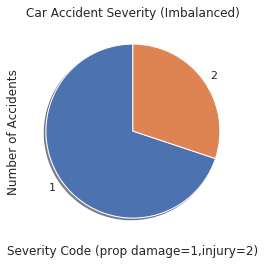

In [48]:

df["SEVERITYCODE"].value_counts().plot(kind='pie',shadow=True, startangle=90)
plt.xlabel('Severity Code (prop damage=1,injury=2)') 
plt.ylabel('Number of Accidents') 
plt.title('Car Accident Severity (Imbalanced)')

In [49]:

# Sorting majority and minority
df_major = df[df["SEVERITYCODE"] == 1]
df_minor = df[df["SEVERITYCODE"] == 2]
df_major.shape

(132488, 38)

In [50]:
df_minor_reform = resample(df_minor,
                                 replace=True,     # sample with replacement
                                 n_samples=132488,    # to match majority class
                                 random_state=250) # reproducible results

#Resampling
df2 = pd.concat([df_major, df_minor_reform])
df2.SEVERITYCODE.value_counts()

2    132488
1    132488
Name: SEVERITYCODE, dtype: int64

In [51]:
df2.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,2,1,NaN,6354039.0,0,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,1,0,NaN,4323031.0,0,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,1,0,NaN,NaN,0,23,From same direction - all others,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,1,0,NaN,NaN,0,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,2,0,NaN,8344002.0,0,10,Entering at angle,0,0,N


In [52]:
df2.columns

Index(['SEVERITYCODE', 'LONGITUDE', 'LATITUDE', 'OBJECTID', 'INCKEY',
       'COLDETKEY', 'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT',
       'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [53]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

# All requested packages already installed.



In [54]:
limit = 1000
df_m1 = df2[["LATITUDE", "LONGITUDE"]]
df_m2 = df_m1.iloc[0:limit, :]

In [55]:


Seattle_map = folium.Map(location=[47.6062, -122.3321], zoom_start=20)

incidents = folium.map.FeatureGroup()


for lat, lng, in zip(df_m2.LATITUDE, df_m2.LONGITUDE):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=6, 
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.9
        )
    )

# MAPPING
Seattle_map.add_child(incidents)



In [56]:
Sev_2 = df2.loc[df2['SEVERITYCODE']==2]
Sev_2.head()

,SEVERITYCODE,LONGITUDE,LATITUDE,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
174606,2,-122.346731,47.523727,195852,278057,278957,3744297,Matched,Block,NaN,...,1,0,NaN,NaN,0,29,From opposite direction - one left turn - one ...,0,0,N
94205,2,-122.289922,47.571582,103349,118504,118504,3344064,Matched,Intersection,32647.0,...,1,0,NaN,10155033.0,0,10,Entering at angle,0,0,N
64588,2,-122.283443,47.551218,70832,85496,85496,2828735,Matched,Intersection,33616.0,...,1,1,NaN,8102005.0,0,10,Entering at angle,0,0,N
147241,2,-122.292119,47.558670,163723,205497,205657,E474557,Matched,Intersection,33564.0,...,1,0,NaN,NaN,0,30,From opposite direction - all others,0,0,N
137296,2,-122.326377,47.595131,152250,180398,180458,3584001,Matched,Intersection,30541.0,...,2,0,NaN,NaN,0,45,Vehicle - Pedalcyclist,5794,0,N


In [57]:
Sev_2_w = Sev_2['WEATHER'].value_counts()
Sev_2_w

1    85253
2    25972
3    20313
5      425
4      410
6       55
7       33
8       19
9        8
Name: WEATHER, dtype: int64

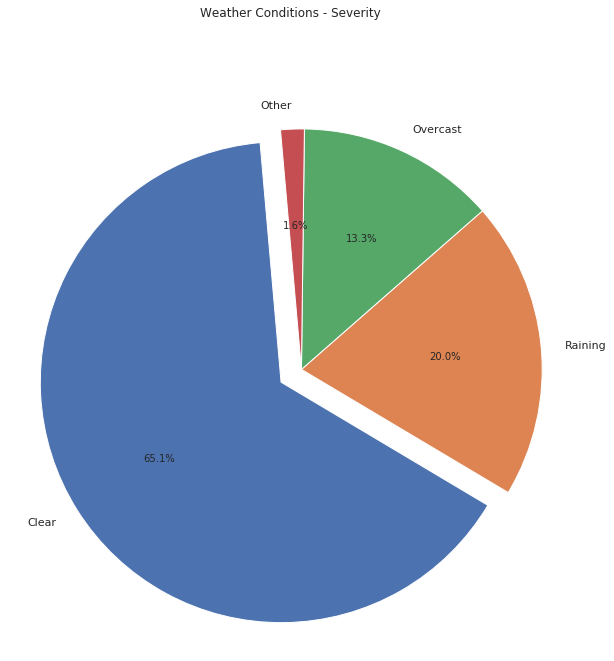

In [58]:

labels = 'Clear', 'Raining', 'Overcast', 'Other'
sizes = [39000, 12000, 8000, sum(Sev_2_w[3:12])]
explode = (0.1,0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=95)
ax1.axis('equal')  
plt.title('Weather Conditions - Severity ', y=1.15)
plt.show()

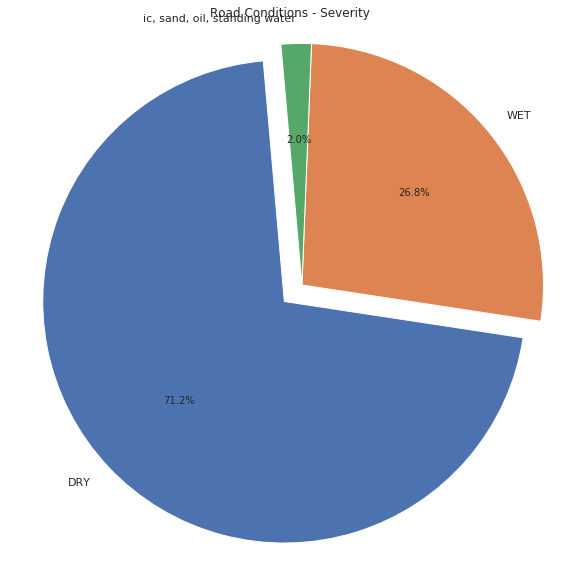

In [59]:

Sev_2_r = Sev_2['ROADCOND'].value_counts()

labels = 'DRY', 'WET', 'ic, sand, oil, standing water'
sizes = [41916, 15755, sum(Sev_2_r[2:7])]
explode = (0.1, 0, 0)
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=95)
ax1.axis('equal')  
plt.title('Road Conditions - Severity ', y=1.)
plt.show()

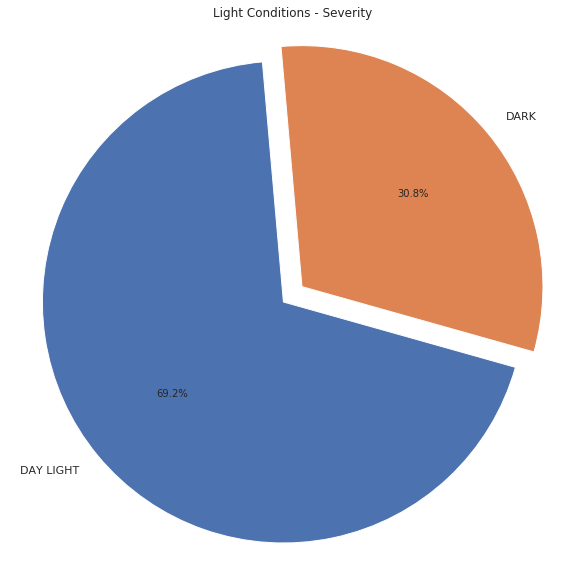

In [60]:
Sev_2_l = Sev_2['LIGHTCOND'].value_counts()
labels = 'DAY LIGHT', 'DARK'
sizes = [40291, 17897]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=95)
ax1.axis('equal')  
plt.title('Light Conditions - Severity', y=1)
plt.show()

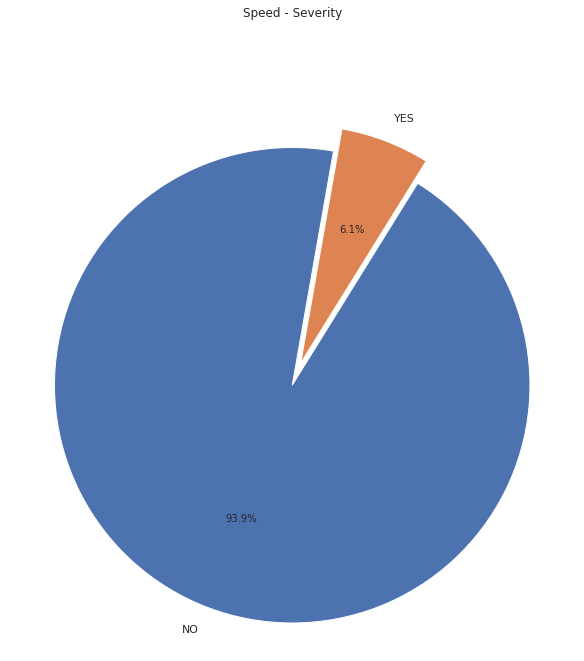

In [61]:
Sev_2_s = Sev_2['SPEEDING'].value_counts()
labels = 'NO', 'YES'
sizes = [54657, 3531]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=80)
ax1.axis('equal')  
plt.title('Speed - Severity', y=1.15)
plt.show()

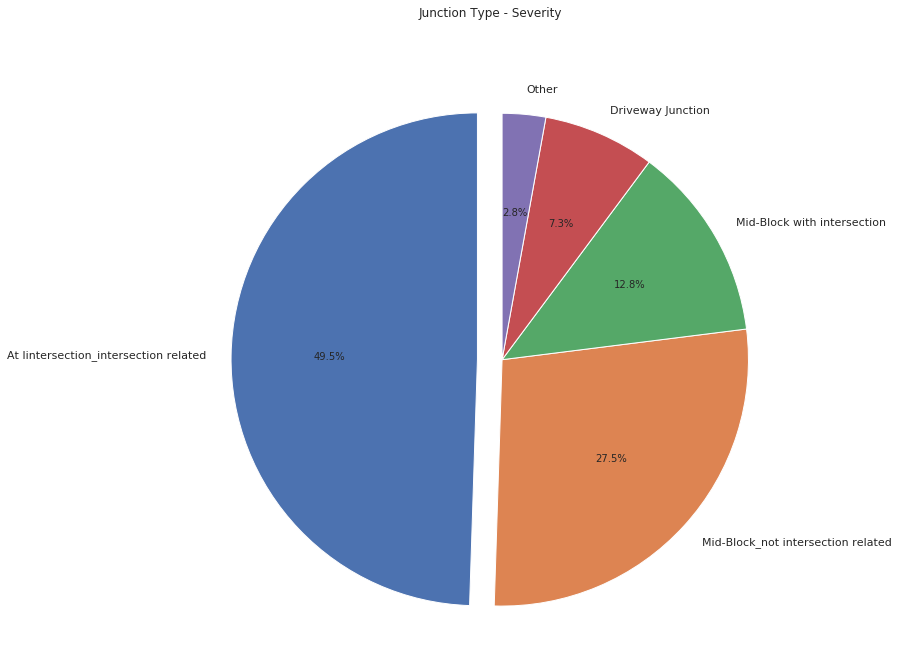

In [62]:
Sev_2_j = Sev_2['JUNCTIONTYPE'].value_counts()
labels = 'At Iintersection_intersection related', 'Mid-Block_not intersection related', 'Mid-Block with intersection', 'Driveway Junction', 'Other'
sizes = [27000, 15000, 7000, 4000, sum(Sev_2_j[4:8])]
explode = (0.1, 0, 0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Junction Type - Severity', y=1.12)
plt.show()

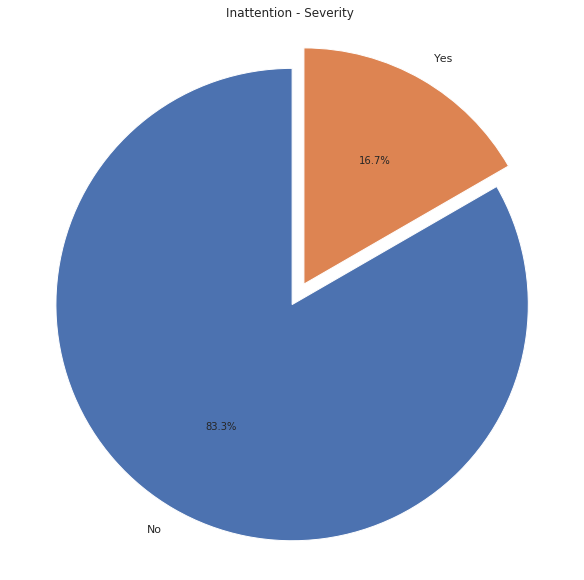

In [63]:
Sev_2_i = Sev_2['INATTENTIONIND'].value_counts()
labels = 'No', 'Yes'
sizes = [49991, 10000]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Inattention - Severity ', y=1)
plt.show()

In [64]:
Feature = df2[['LONGITUDE', 'LATITUDE', 'PERSONCOUNT', 'VEHCOUNT',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING']]

In [65]:
X = Feature
y = df2['SEVERITYCODE'].values

In [66]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[-0.57396601,  0.48630445, -0.37421772,  0.08416229, -0.8799993 ,
        -0.44226666,  0.61678635,  1.36913322,  1.47445294, -0.23647635],
       [-0.14201763, -0.21418029,  1.0327878 ,  1.7318156 , -0.8799993 ,
        -0.44226666,  1.87086149, -0.55751279, -0.67821764, -0.23647635],
       [-0.15093478, -0.26887259,  0.32928504,  1.7318156 , -0.8799993 ,
        -0.44226666, -0.63728879, -0.55751279, -0.67821764, -0.23647635],
       [-1.93893007,  1.25989965, -0.37421772,  0.08416229,  0.19111157,
        -0.44226666, -0.63728879, -0.55751279, -0.67821764, -0.23647635],
       [-0.27560893, -0.02413054, -0.37421772,  0.08416229,  0.19111157,
        -0.44226666,  0.61678635,  1.36913322, -0.67821764, -0.23647635]])

In [67]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (211980, 10) (211980,)
Test set: (52996, 10) (52996,)


In [68]:
Ks = 8
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    # Training 
    kNNeigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = kNNeigh.predict(X_test)
    
    
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.79170126, 0.74375425, 0.73799909, 0.7178655 , 0.71335572,
       0.70444939, 0.70369462])

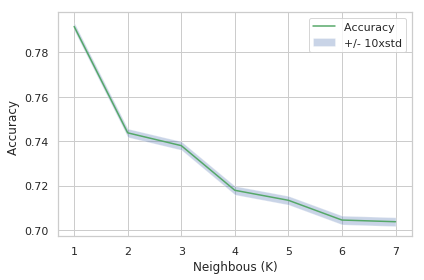

In [80]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.30)
plt.legend(('Accuracy ', '+/- 10xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Neighbous (K)')
plt.tight_layout()
plt.show()

In [82]:
print( "Best k =", mean_acc.argmax()+1)

k=5
kNNeigh= KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
kNNeigh

Best k = 1


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [83]:
print("K-Nearest Neighbours Accuray: ", metrics.accuracy_score(y_test, yhat))

K-Nearest Neighbours Accuray:  0.7036946184617707


In [84]:
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)
DTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [85]:
yhat = DTree.predict(X_test)

In [86]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))

DecisionTrees's Accuracy:  0.6782398671597857


In [87]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:

LogisticRegression(C=0.01, solver='liblinear')

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [89]:
yhat = LR.predict(X_test)

In [90]:
print("Logistic Regresion's Accuracy: ", metrics.accuracy_score(y_test, yhat))

Logistic Regresion's Accuracy:  0.6315193599516945


In [91]:
clf=RandomForestClassifier(n_estimators=400)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [92]:
yhat =clf.predict(X_test)

In [93]:
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test, yhat))

Random Forest's Accuracy:  0.814382217525851


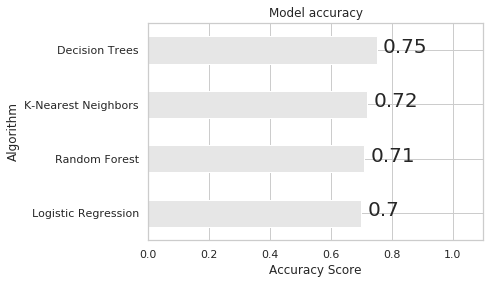

In [106]:
algo_lst =['K-Nearest Neighbors','Decision Trees','Logistic Regression','Random Forest']

accuracy_lst = [0.72, 0.75, 0.70, 0.71]


y_ticks=np.arange(len(algo_lst))


df_acc=pd.DataFrame(list(zip(algo_lst, accuracy_lst)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)


ax=df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False,color='0.9')


for i in ax.patches:
   
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=20)

plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title('Model accuracy')

plt.show()
